In [1]:
#Gerando os arquivos para cada caso mas omitindo a cada run

#Bibliotecas:
import numpy as np
import pandas as pd
from qutip import *
import csv 
import latex

import matplotlib.pyplot as plt 
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": "18",
    "font.serif": ["Times New Roman"]})
import matplotlib
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)
matplotlib.rc('legend', fontsize=14) 
import matplotlib.gridspec as gridspec
from palettable.colorbrewer.qualitative import Set1_5

In [2]:
#Parâmetros (defino o que parace no Hamiltoniano):
 
Nat=1    #caso para 1 átomo    
kappa = 1.0    #taxa de dissipação da cavidade
g = 5.0*kappa/np.sqrt(Nat)    #força de interação/constante de acoplamento
#frequência de Rabi do campo de controle (omegac > omegap para satisfazer o EIT, 
#essa desigualdade não pode ser muito grande, ultrapassando a largura do estado vestido)
epsilon = np.sqrt(0.1)*kappa    #1 fóton na cavidade com 1.0*kappa
omegac = 1.0*kappa
Delta1 = 0.0*kappa           
Delta2 = 0.0*kappa    #ressonante (delta2 = 0)
DeltaP_list = np.linspace(-1,1,101)*kappa
     
gamma = 1.0    #taxa de dissipação do átomo (espontâneo)
gamma_13 = 0.5*gamma
gamma_23 = 0.5*gamma

N = 6    #número de estados Focks na cavidade (truncamento)

tlist = np.linspace(0,100,20)/kappa

In [3]:
#Estados ( |k> = (N,k-1) , N úmero total de estados):

state1 = basis(3,0)
state2 = basis(3,1)
state3 = basis(3,2) 

#Operadores (S representa o sigma - sigma_nm = |n><m|
#- simgma_nm=tensor(qeye(N),staten*statem.dag())):

S11 = tensor(qeye(N),state1*state1.dag())
S22 = tensor(qeye(N),state2*state2.dag()) 
S31 = tensor(qeye(N),state3*state1.dag())
S13 = tensor(qeye(N),state1*state3.dag())
S32 = tensor(qeye(N),state3*state2.dag())
S23 = tensor(qeye(N),state2*state3.dag())
S33 = tensor(qeye(N),state3*state3.dag())

#operador de aniquilação dos fótons (destrói uma estação do campo)
a = tensor(destroy(N),qeye(3))  


#Operadores de colapso:

c_ops_cav = np.sqrt(kappa)*a 

c_ops_atom_13 = np.sqrt(gamma_13)*S13

c_ops_atom_23 = np.sqrt(gamma_23)*S23

#Dissipação:

c_ops_list = [c_ops_cav, c_ops_atom_13, c_ops_atom_23]

In [72]:
trans_ss_list = []

for i in range(len(DeltaP_list)):
    
    DeltaP = DeltaP_list[i]
    
    
    #Hamiltoniano: 

    H = Delta1*S33 + (Delta1-Delta2)*S22 + DeltaP*S11 - DeltaP*a.dag()*a + (g*a*S31 + omegac*S32 + epsilon*a + g*a.dag()*S13 + omegac*S23 + epsilon*a.dag())


    #Evolução temporal: equação mestra

    #psi0 = tensor(basis(N,0), state2)
    #output = mesolve(H,psi0,tlist,c_ops_list,[a.dag()*a])
    #trans_ss = output.expect[0]
    #trans_ss_list.append(trans_ss[-1]/((4*(epsilon**2)/kappa**2)))    #[-1] última componente
    
    #steady state method (demands a high amount of memory as we increase the system's dimension)
    rho_a = steadystate(H, c_ops_list, method='iterative-gmres', use_precond=True, use_rcm=True, maxiter=1000, tol=1e-12)
    nm_a = expect(a.dag()*a, rho_a)  
    trans_ss_list.append(nm_a/((4*(epsilon**2)/kappa**2)))

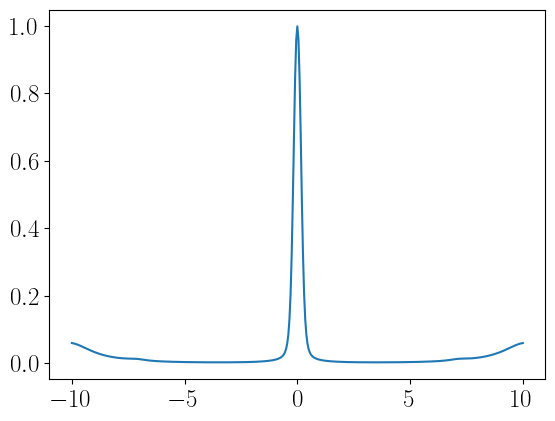

In [73]:
#pré-plot da etapa de geração de dados para a cavidade vazia
plt.plot(DeltaP_list,trans_ss_list)
plt.show()

In [69]:
#Parâmetros a serem colocados e forma de salvar os arquivos:
#(Código feito para rodar três vezes)

#CEIT:
#omegac=2*kappa, gamma23=gamma13=0.5*kappa, psi0 = tensor(basis(N,0), state2)
output_data = np.vstack((DeltaP_list,trans_ss_list))
file_data_store("CEIT_quantum_Nat2_g5_ep01.csv",output_data.T, numtype="real", numformat="decimal", sep= ",") 
#Átomo de dois níveis:
#omegac=0.0, gamma23=0.0, gamma13=0.5*kappa, psi0 = tensor(basis(N,0), state1)
#output_data = np.vstack((DeltaP_list,trans_ss_list))
#file_data_store("atomo_2niveis.dat", output_data.T, numtype = "real", numformat = "decimal", sep = " ")

#Cavidade vazia:
#omegac=0.0, gamma23=gamma13=0.5*kappa, psi0 = tensor(basis(N,0), state2)
#output_data = np.vstack((DeltaP_list,trans_ss_list))
#file_data_store("cavidade_vazia.dat", output_data.T, numtype = "real", numformat = "decimal", sep = " ") 

In [2]:
#Importando os arquivos:

CEIT_dados = np.loadtxt("CEIT.dat") 
Delta_list = CEIT_dados[:,0]  #toma as linhas da primeira coluna
CEIT_list = CEIT_dados[:,1]   ##toma as linhas da segunda coluna

dois_niveis_dados = np.loadtxt("atomo_2niveis.dat")
dois_niveis_list = dois_niveis_dados[:,1]

cavidade_vazia_dados = np.loadtxt("cavidade_vazia.dat")
cavidade_vazia_list = cavidade_vazia_dados[:,1]

#Mathematica
M1 = np.loadtxt('CEIT_semiclassical_Nat1_g0_ep01_05kappa.csv', delimiter=',')
M2 = np.loadtxt('CEIT_semiclassical_Nat1_g0_ep01_1kappa.csv', delimiter=',')
M3 = np.loadtxt('CEIT_semiclassical_Nat1_g0_ep01_2kappa.csv', delimiter=',')
M4 = np.loadtxt('CEIT_semiclassical_Nat3_g0_ep01.csv', delimiter=',')
M5 = np.loadtxt('CEIT_semiclassical_Nat1_g01_ep01_05kappa.csv', delimiter=',')
M6 = np.loadtxt('CEIT_semiclassical_Nat1_g1_ep01_05kappa.csv', delimiter=',')
M7 = np.loadtxt('CEIT_semiclassical_Nat1_g5_ep01_05kappa.csv', delimiter=',')
M8 = np.loadtxt('CEIT_semiclassical_Nat1_g10_ep01_05kappa.csv', delimiter=',')

#QuTip
N1 = np.loadtxt('CEIT_quantum_Nat1_g0_ep01_05kappa.csv', delimiter=',')
N2 = np.loadtxt('CEIT_quantum_Nat1_g0_ep01_1kappa.csv', delimiter=',')
N3 = np.loadtxt('CEIT_quantum_Nat1_g0_ep01_2kappa.csv', delimiter=',')
N4 = np.loadtxt('CEIT_quantum_Nat1_g01_ep01_1kappa.csv', delimiter=',')
N5 = np.loadtxt('CEIT_quantum_Nat1_g1_ep01_1kappa.csv', delimiter=',')
N6 = np.loadtxt('CEIT_quantum_Nat1_g5_ep01_1kappa.csv', delimiter=',')
N7 = np.loadtxt('CEIT_quantum_Nat1_g10_ep01_1kappa.csv', delimiter=',')


#test: multiplicando todos os parâmetros por 2 (2*kappa)
O1 = np.loadtxt('CEIT_semiclassical_Nat1_g0_ep01_2vz05kappa.csv', delimiter=',')
O2 = np.loadtxt('CEIT_semiclassical_Nat1_g01_ep01_2vz05kappa.csv', delimiter=',')
O3 = np.loadtxt('CEIT_semiclassical_Nat1_g1_ep01_2vz05kappa.csv', delimiter=',')
O4 = np.loadtxt('CEIT_semiclassical_Nat1_g5_ep01_2vz05kappa.csv', delimiter=',')
O5 = np.loadtxt('CEIT_semiclassical_Nat1_g10_ep01_2vz05kappa.csv', delimiter=',')

#test: Oc=2*kappa
P1 = np.loadtxt('CEIT_semiclassical_Nat1_g0_ep01_1Oc_05kappa.csv', delimiter=',')
P2 = np.loadtxt('CEIT_semiclassical_Nat1_g1_ep01_1Oc_05kappa.csv', delimiter=',')
P3 = np.loadtxt('CEIT_semiclassical_Nat1_g1_ep01_1Oc_05kappa.csv', delimiter=',')
P4 = np.loadtxt('CEIT_semiclassical_Nat1_g5_ep01_1Oc_05kappa.csv', delimiter=',')
P5 = np.loadtxt('CEIT_semiclassical_Nat1_g10_ep01_1Oc_05kappa.csv', delimiter=',')

#Integração - Mathematica: 
I1 = np.loadtxt('semiclassical_int_Nat1_g01_ep01_1kappa.csv', delimiter=',')
I2 = np.loadtxt('semiclassical_int_Nat1_g1_ep01_1kappa.csv', delimiter=',')
I3 = np.loadtxt('semiclassical_int_Nat1_g5_ep01_1kappa.csv', delimiter=',')
I4 = np.loadtxt('semiclassical_int_Nat1_g10_ep01_1kappa.csv', delimiter=',')
I5 = np.loadtxt('semiclassical_int_Nat1_g01_ep01_2vsparameters_05kappa.csv', delimiter=',')
I6 = np.loadtxt('semiclassical_int_Nat1_g1_ep01_2vsparameters_05kappa.csv', delimiter=',')
I7 = np.loadtxt('semiclassical_int_Nat1_g5_ep01_2vsparameters_05kappa.csv', delimiter=',')
I8 = np.loadtxt('semiclassical_int_Nat1_g10_ep01_2vsparameters_05kappa.csv', delimiter=',')
I9 = np.loadtxt('semiclassical_int_Nat1_g01_ep01_qutipdef.csv', delimiter=',')
I10 = np.loadtxt('semiclassical_int_Nat1_g1_ep01_qutipdef.csv', delimiter=',')
I11 = np.loadtxt('semiclassical_int_Nat1_g5_ep01_qutipdef.csv', delimiter=',')
I12 = np.loadtxt('semiclassical_int_Nat1_g10_ep01_qutipdef.csv', delimiter=',')

#Integração - MatLab: 
T1 = np.loadtxt('semiclassical_intML_Nat1_g01_ep01_1kappa.csv', delimiter=',')
T2 = np.loadtxt('semiclassical_intML_Nat1_g1_ep01_1kappa.csv', delimiter=',')
T3 = np.loadtxt('semiclassical_intML_Nat1_g5_ep01_1kappa.csv', delimiter=',')
T4 = np.loadtxt('semiclassical_intML_Nat1_g10_ep01_1kappa.csv', delimiter=',')

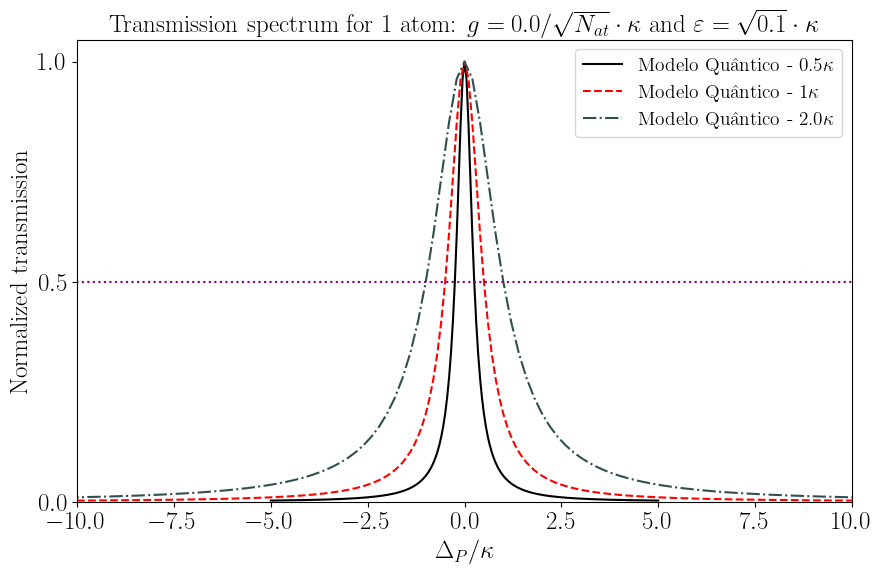

In [15]:
#Espectro de transmissão: Modelo Quântico variando kappa

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N1[:,0], N1[:,1], color = "k", linestyle = "-", linewidth = 1.5)
ax1.plot(N2[:,0], N2[:,1], color = "red", linestyle = "--", linewidth = 1.5)
ax1.plot(N3[:,0], N3[:,1], color = "darkslategray", linestyle = "-.", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
ax1.legend(["Modelo Quântico - $0.5\kappa$", "Modelo Quântico - $1\kappa$","Modelo Quântico - $2.0\kappa$"]) 
plt.title(r'Transmission spectrum for 1 atom: $g=0.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N1[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_quantum_allkappa.png",format='png', dpi=600)
plt.show()

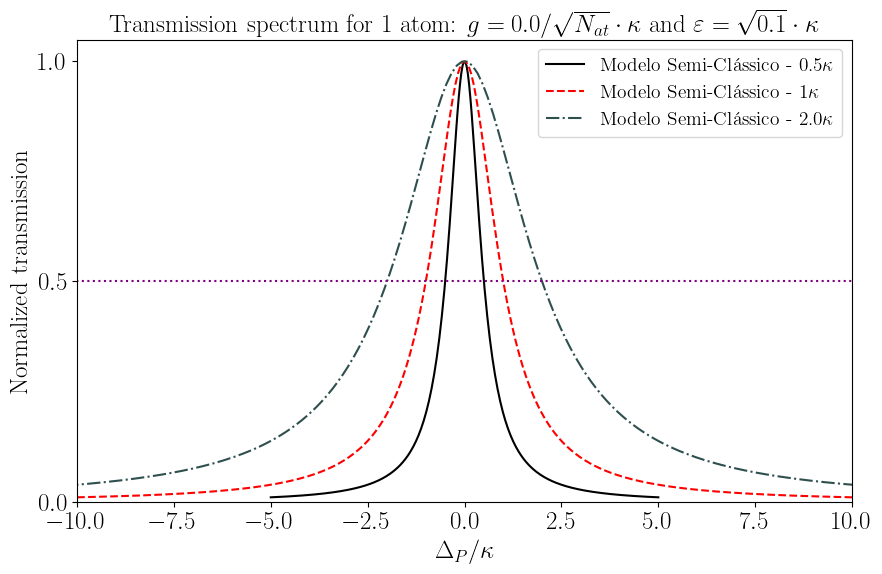

In [58]:
#Espectro de transmissão: Modelo Semi-clássico variando kappa

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(M1[:,0], M1[:,1], color = "k", linestyle = "-", linewidth = 1.5)
ax1.plot(M2[:,0], M2[:,1], color = "red", linestyle = "--", linewidth = 1.5)
ax1.plot(M3[:,0], M3[:,1], color = "darkslategray", linestyle = "-.", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
#ax1.legend(["Cavity-EIT", "Two-level atom", "Empty cavity"]) 
ax1.legend(["Modelo Semi-Clássico  - $0.5\kappa$", "Modelo Semi-Clássico  - $1\kappa$","Modelo Semi-Clássico - $2.0\kappa$"]) 
plt.title(r'Transmission spectrum for 1 atom: $g=0.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(M1[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_semiclassical_allkappa.png",format='png', dpi=600)
plt.show()

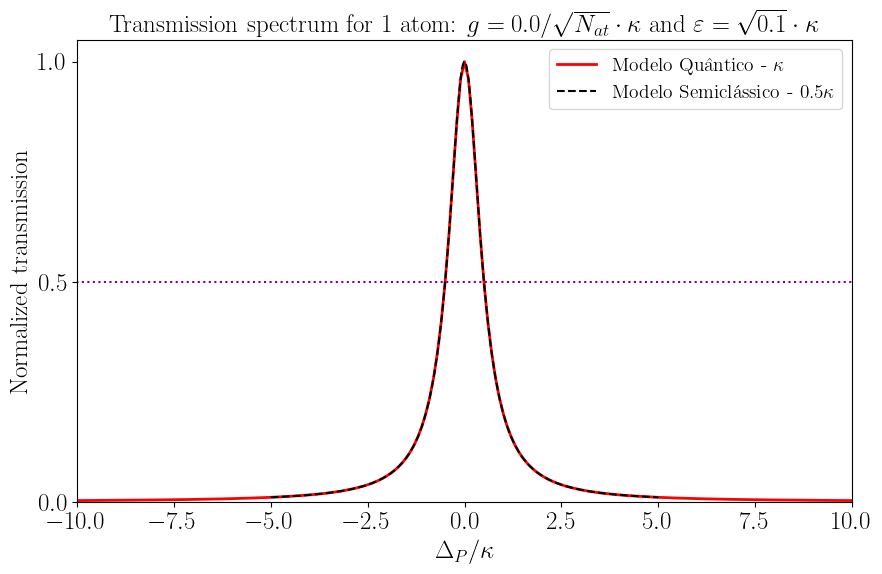

In [13]:
#Comparando espectros de cada modelo pelo acoplamento: g=0

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N2[:,0],N2[:,1], color = "red", linewidth = 2)
ax1.plot(M1[:,0], M1[:,1], color = "k", linestyle = "--", linewidth = 1.5)
#ax1.plot(M2[:,0], M2[:,1], color = "darkslategray", linestyle = "--", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
#ax1.legend(["Cavity-EIT", "Two-level atom", "Empty cavity"]) 
ax1.legend(["Modelo Quântico - $\kappa$", "Modelo Semiclássico - $0.5\kappa$"]) 
plt.title(r'Transmission spectrum for 1 atom: $g=0.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N2[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g0_ep01_compare_QSC.png",format='png', dpi=600)
plt.show()

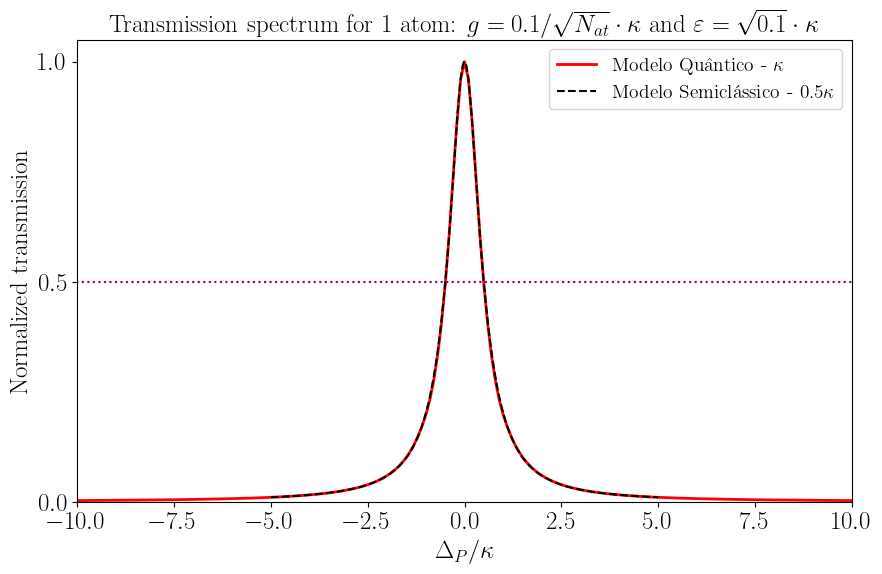

In [14]:
#Comparando espectros de cada modelo pelo acoplamento: g=0.1

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N4[:,0],N4[:,1], color = "red", linewidth = 2)
ax1.plot(M5[:,0], M5[:,1], color = "k", linestyle = "--", linewidth = 1.5)
#ax1.plot(M2[:,0], M2[:,1], color = "darkslategray", linestyle = "--", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
#ax1.legend(["Cavity-EIT", "Two-level atom", "Empty cavity"]) 
ax1.legend(["Modelo Quântico - $\kappa$", "Modelo Semiclássico - $0.5\kappa$"]) 
plt.title(r'Transmission spectrum for 1 atom: $g=0.1/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N4[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g01_ep01_compare_QSC.png",format='png', dpi=600)
plt.show()

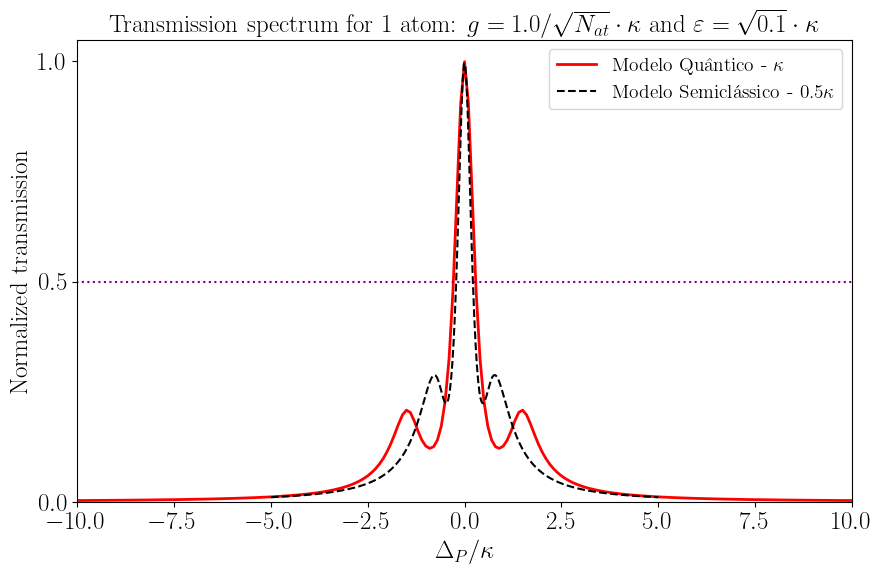

In [16]:
#Comparando espectros de cada modelo pelo acoplamento: g=1.0

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N5[:,0],N5[:,1], color = "red", linewidth = 2)
ax1.plot(M6[:,0], M6[:,1], color = "k", linestyle = "--", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
#ax1.legend(["Cavity-EIT", "Two-level atom", "Empty cavity"]) 
ax1.legend(["Modelo Quântico - $\kappa$", "Modelo Semiclássico - $0.5\kappa$"]) 
plt.title(r'Transmission spectrum for 1 atom: $g=1.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N5[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g1_ep01_compare_QSC.png",format='png', dpi=600)
plt.show()

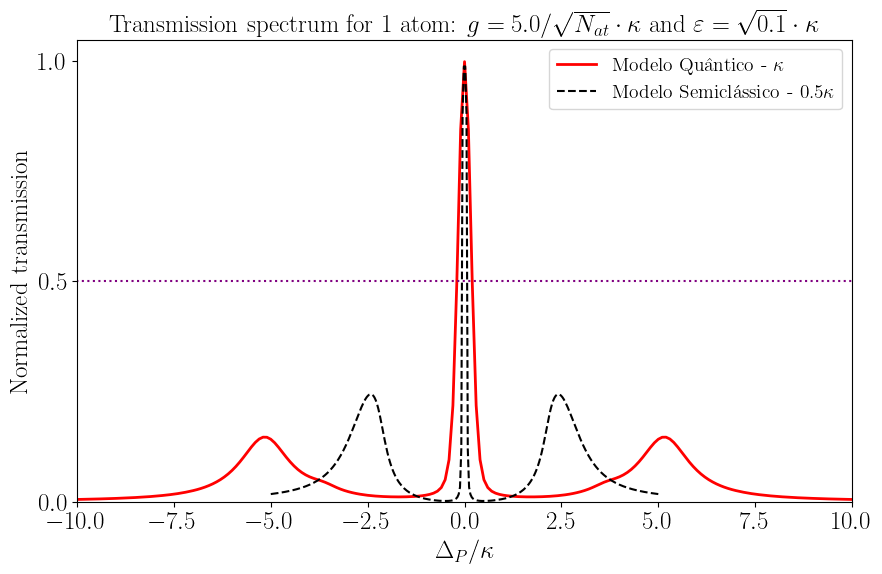

In [17]:
#Comparando espectros de cada modelo pelo acoplamento: g=5.0

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N6[:,0],N6[:,1], color = "red", linewidth = 2)
ax1.plot(M7[:,0], M7[:,1], color = "k", linestyle = "--", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
#ax1.legend(["Cavity-EIT", "Two-level atom", "Empty cavity"]) 
ax1.legend(["Modelo Quântico - $\kappa$", "Modelo Semiclássico - $0.5\kappa$"]) 
plt.title(r'Transmission spectrum for 1 atom: $g=5.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N6[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g5_ep01_compare_QSC.png",format='png', dpi=600)
plt.show()

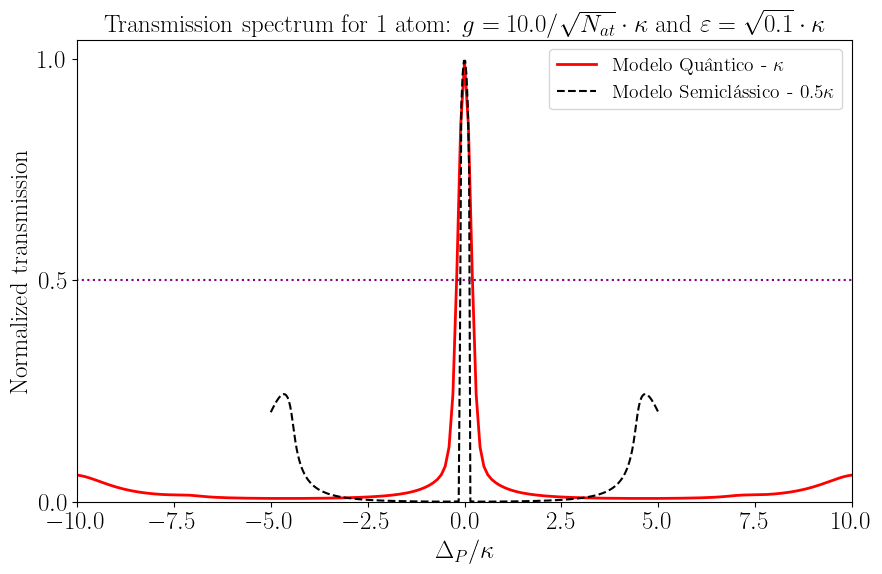

In [18]:
#Comparando espectros de cada modelo pelo acoplamento: g=10.0

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N7[:,0],N7[:,1], color = "red", linewidth = 2)
ax1.plot(M8[:,0], M8[:,1], color = "k", linestyle = "--", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
#ax1.legend(["Cavity-EIT", "Two-level atom", "Empty cavity"]) 
ax1.legend(["Modelo Quântico - $\kappa$", "Modelo Semiclássico - $0.5\kappa$"]) 
plt.title(r'Transmission spectrum for 1 atom: $g=10.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N7[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g10_ep01_compare_QSC.png",format='png', dpi=600)
plt.show()

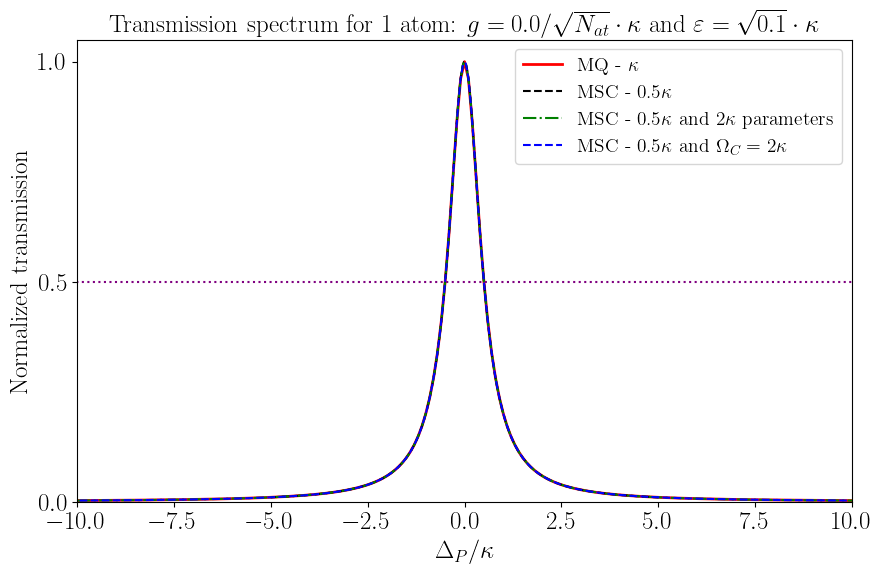

In [6]:
#Comparando espectros de cada modelo pelo acoplamento: g=0 e teste para parâmetros=2*kappa ou Oc=2*kappa

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N2[:,0],N2[:,1], color = "red",linestyle = "-", linewidth = 2)
ax1.plot(M1[:,0], M1[:,1], color = "k", linestyle = "--", linewidth = 1.5)
ax1.plot(O1[:,0], O1[:,1], color = "green", linestyle = "-.", linewidth = 1.5)
ax1.plot(P1[:,0], P1[:,1], color = "blue", linestyle = "--", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
ax1.legend(["MQ - $\kappa$", "MSC - $0.5\kappa$","MSC - $0.5\kappa$ and $2\kappa$ parameters","MSC - $0.5\kappa$ and $\Omega_C=2\kappa$"]) 
plt.title(r'Transmission spectrum for 1 atom: $g=0.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N2[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g0_ep01_compare_QSC_tests.png",format='png', dpi=600)
plt.show()

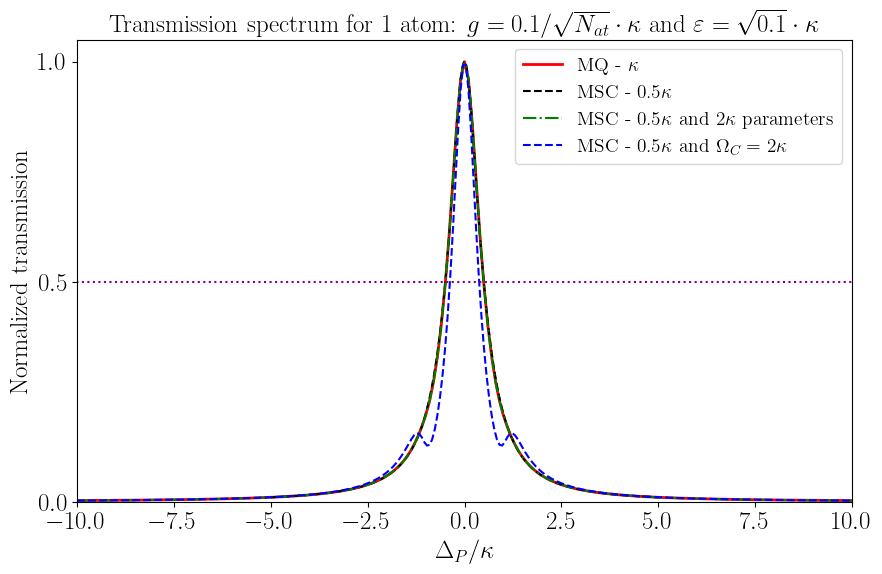

In [7]:
#Comparando espectros de cada modelo pelo acoplamento: g=0.1 e teste para parâmetros=2*kappa ou Oc=2*kappa

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N4[:,0],N4[:,1], color = "red",linestyle = "-", linewidth = 2)
ax1.plot(M5[:,0], M5[:,1], color = "k", linestyle = "--", linewidth = 1.5)
ax1.plot(O2[:,0], O2[:,1], color = "green", linestyle = "-.", linewidth = 1.5)
ax1.plot(P2[:,0], P2[:,1], color = "blue", linestyle = "--", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
ax1.legend(["MQ - $\kappa$", "MSC - $0.5\kappa$","MSC - $0.5\kappa$ and $2\kappa$ parameters","MSC - $0.5\kappa$ and $\Omega_C=2\kappa$"]) 
plt.title(r'Transmission spectrum for 1 atom: $g=0.1/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N4[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g01_ep01_compare_QSC_tests.png",format='png', dpi=600)
plt.show()

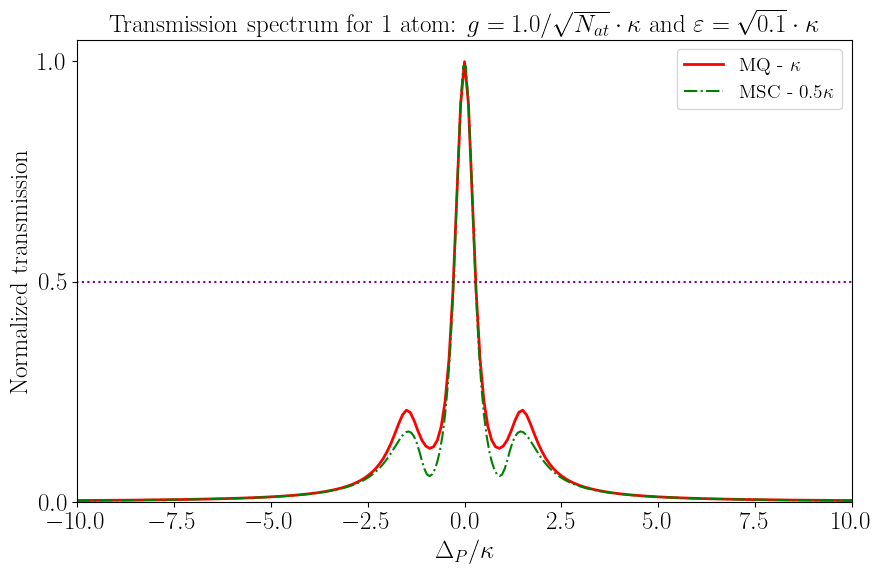

In [4]:
#Comparando espectros de cada modelo pelo acoplamento: g=1.0 e teste para parâmetros=2*kappa ou Oc=2*kappa

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N5[:,0],N5[:,1], color = "red",linestyle = "-", linewidth = 2)
#ax1.plot(M6[:,0], M6[:,1], color = "k", linestyle = "--", linewidth = 1.5)
ax1.plot(O3[:,0], O3[:,1], color = "green", linestyle = "-.", linewidth = 1.5)
#ax1.plot(P3[:,0], P3[:,1], color = "blue", linestyle = "--", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
ax1.legend(["MQ - $\kappa$", "MSC - $0.5\kappa$","MSC - $0.5\kappa$ and $2\kappa$ parameters","MSC - $0.5\kappa$ and $\Omega_C=2\kappa$"]) 
plt.title(r'Transmission spectrum for 1 atom: $g=1.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N5[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g1_ep01_compare_QSC_tests.png",format='png', dpi=600)
plt.show()

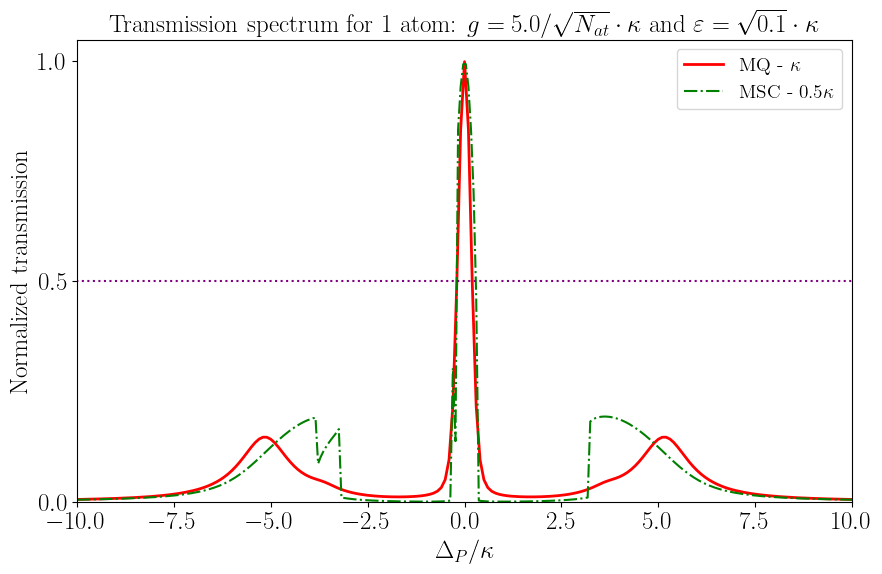

In [5]:
#Comparando espectros de cada modelo pelo acoplamento: g=5.0 e teste para parâmetros=2*kappa ou Oc=2*kappa

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N6[:,0],N6[:,1], color = "red",linestyle = "-", linewidth = 2)
#ax1.plot(M7[:,0], M7[:,1], color = "k", linestyle = "--", linewidth = 1.5)
ax1.plot(O4[:,0], O4[:,1], color = "green", linestyle = "-.", linewidth = 1.5)
#ax1.plot(P4[:,0], P4[:,1], color = "blue", linestyle = "--", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
ax1.legend(["MQ - $\kappa$", "MSC - $0.5\kappa$","MSC - $0.5\kappa$ and $2\kappa$ parameters","MSC - $0.5\kappa$ and $\Omega_C=2\kappa$"]) 
plt.title(r'Transmission spectrum for 1 atom: $g=5.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N6[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g5_ep01_compare_QSC_tests.png",format='png', dpi=600)
plt.show()

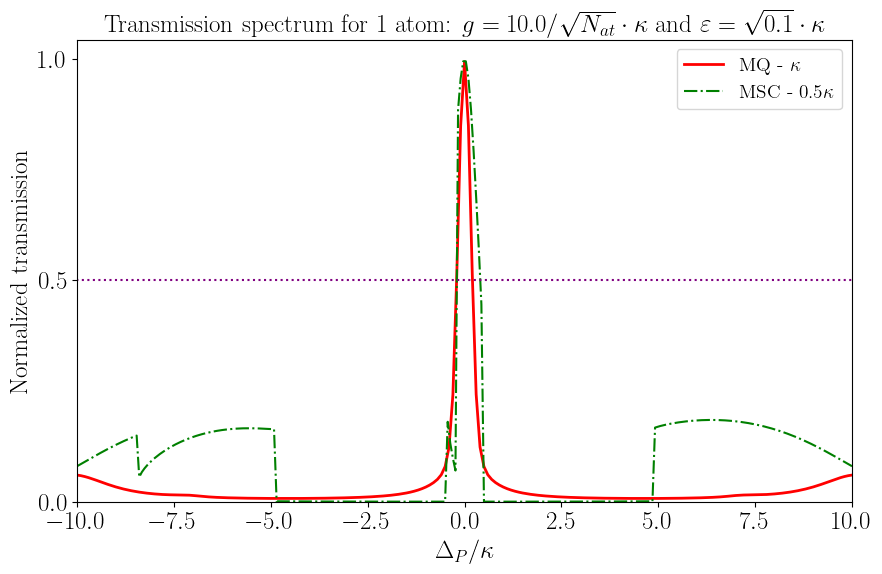

In [6]:
#Comparando espectros de cada modelo pelo acoplamento: g=10.0 e teste para parâmetros=2*kappa ou Oc=2*kappa

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N7[:,0],N7[:,1], color = "red",linestyle = "-", linewidth = 2)
#ax1.plot(M8[:,0], M8[:,1], color = "k", linestyle = "--", linewidth = 1.5)
ax1.plot(O5[:,0], O5[:,1], color = "green", linestyle = "-.", linewidth = 1.5)
#ax1.plot(P5[:,0], P5[:,1], color = "blue", linestyle = "--", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
ax1.legend(["MQ - $\kappa$", "MSC - $0.5\kappa$","MSC - $0.5\kappa$ and $2\kappa$ parameters","MSC - $0.5\kappa$ and $\Omega_C=2\kappa$"]) 
plt.title(r'Transmission spectrum for 1 atom: $g=10.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N7[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g10_ep01_compare_QSC_tests.png",format='png', dpi=600)
plt.show()

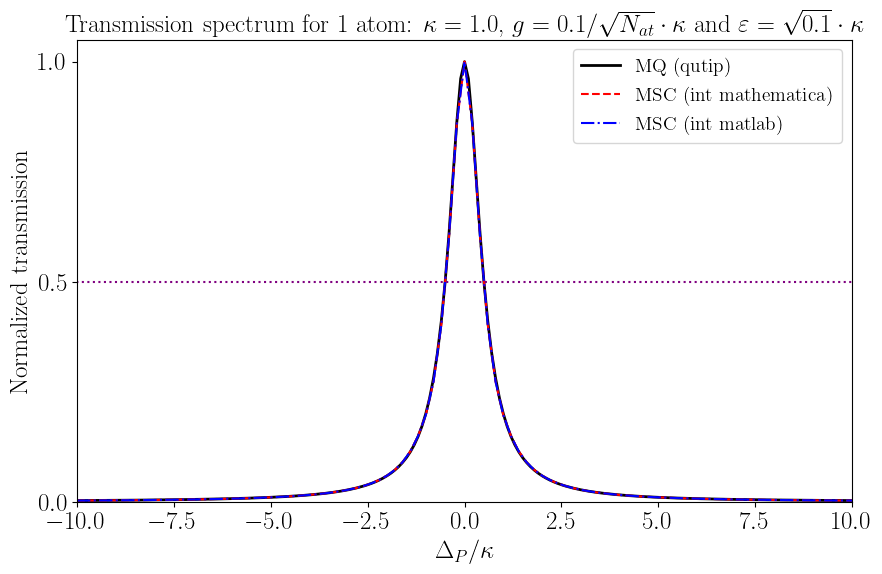

In [3]:
#Integração em SC: comparando espectros de cada modelo e diferentes softwares pelo acoplamento - g=0.1

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N2[:,0],N2[:,1], color = "k", linewidth = 2)
ax1.plot(I9[:,0], I9[:,1], color = "r", linestyle = "--", linewidth = 1.5)
ax1.plot(T1[:,0], T1[:,1], color = "b", linestyle = "-.", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
ax1.legend(["MQ (qutip)", "MSC (int mathematica)", "MSC (int matlab)"]) 
plt.title(r'Transmission spectrum for 1 atom: $\kappa=1.0$, $g=0.1/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N2[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g01_ep01_compare_int_QSC.png",format='png', dpi=600)
plt.show()

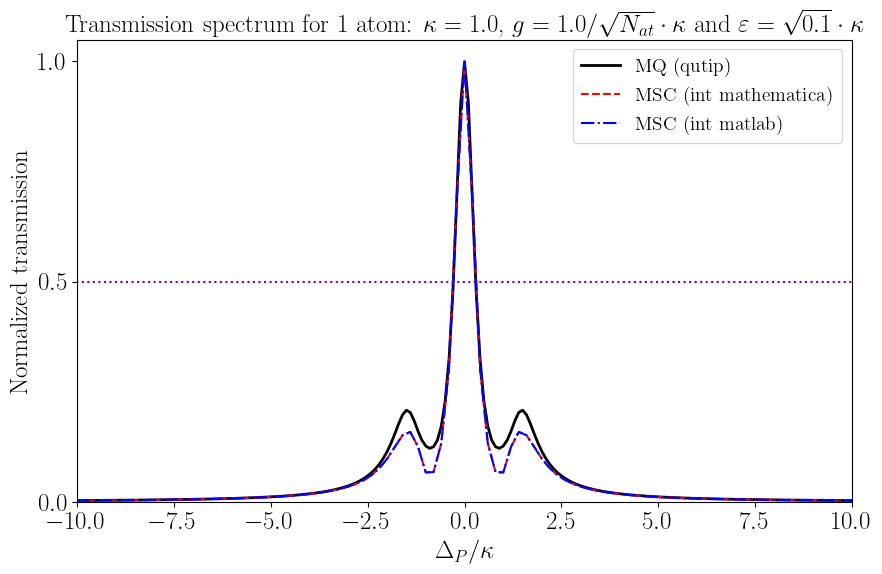

In [4]:
#Integração em SC: comparando espectros de cada modelo e diferentes softwares pelo acoplamento - g=1.0

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N5[:,0],N5[:,1], color = "k", linewidth = 2)
ax1.plot(I10[:,0], I10[:,1], color = "r", linestyle = "--", linewidth = 1.5)
ax1.plot(T2[:,0], T2[:,1], color = "b", linestyle = "-.", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
ax1.legend(["MQ (qutip)", "MSC (int mathematica)", "MSC (int matlab)"]) 
ax1.set_xlabel("$\Delta_P/\kappa$")
plt.title(r'Transmission spectrum for 1 atom: $\kappa=1.0$, $g=1.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N5[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g1_ep01_compare_int_QSC.png",format='png', dpi=600)
plt.show()

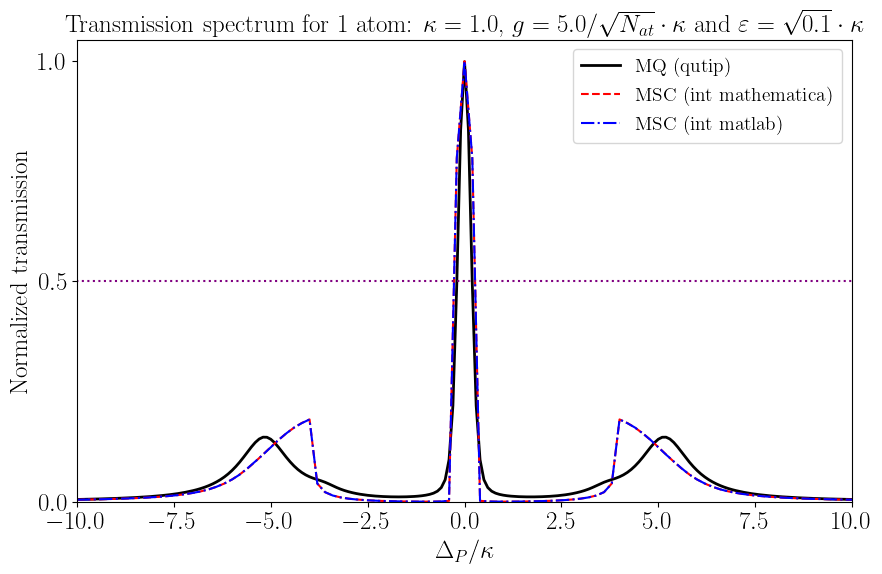

In [5]:
#Integração em SC: comparando espectros de cada modelo e diferentes softwares pelo acoplamento - g=5.0

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N6[:,0],N6[:,1], color = "k", linewidth = 2)
ax1.plot(I11[:,0], I11[:,1], color = "r", linestyle = "--", linewidth = 1.5)
ax1.plot(T3[:,0], T3[:,1], color = "b", linestyle = "-.", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
ax1.legend(["MQ (qutip)", "MSC (int mathematica)", "MSC (int matlab)"]) 
plt.title(r'Transmission spectrum for 1 atom: $\kappa=1.0$, $g=5.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N6[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g5_ep01_compare_int_QSC.png",format='png', dpi=600)
plt.show()

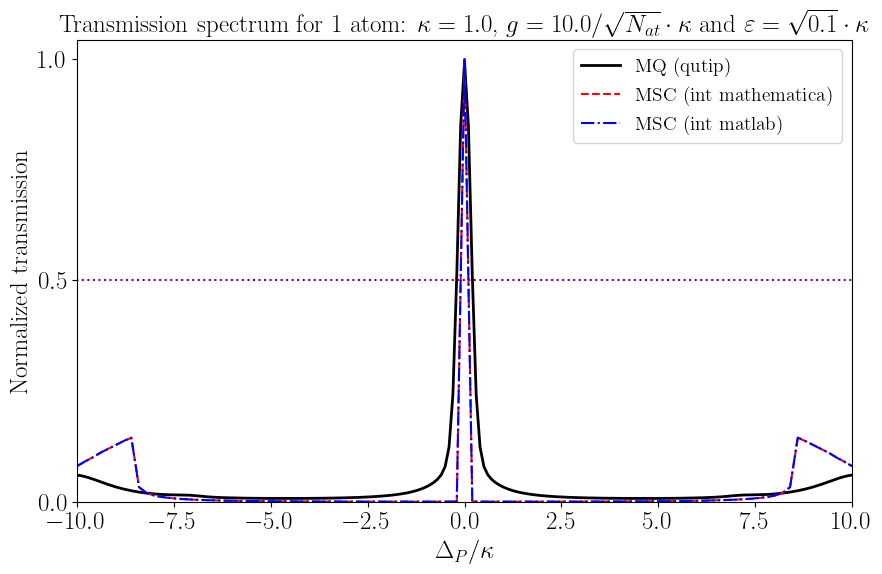

In [6]:
#Integração em SC: comparando espectros de cada modelo e diferentes softwares pelo acoplamento - g=10.0

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(N7[:,0],N7[:,1], color = "k", linewidth = 2)
ax1.plot(I12[:,0], I12[:,1], color = "r", linestyle = "--", linewidth = 1.5)
ax1.plot(T4[:,0], T4[:,1], color = "b", linestyle = "-.", linewidth = 1.5)
ax1.set_xlabel("$\Delta_P/\kappa$")
ax1.set_ylabel("Normalized transmission")
ax1.legend(["MQ (qutip)", "MSC (int mathematica)", "MSC (int matlab)"]) 
plt.title(r'Transmission spectrum for 1 atom: $\kappa=1.0$, $g=10.0/\sqrt{N_{at}}\cdot\kappa$ and $\varepsilon=\sqrt{0.1}\cdot\kappa$', fontsize=18)
plt.xlim(-10,10)
plt.ylim(0, 1.05*np.max(N7[:,1])) 
plt.axhline(y=0.5, xmin=-10.0, xmax=10.0, color="purple", linestyle = ':')
plt.yticks([0,0.5,1.0])
plt.savefig("EIT_transmission_Nat1_g10_ep01_compare_int_QSC.png",format='png', dpi=600)
plt.show()